# 第6章 缺失数据
2020.06.19 1st, 

In [74]:
!type data\table_missing.csv
# 是以空字符串的方式保存缺失值的.

School,Class,ID,Gender,Address,Height,Weight,Math,Physics
S_1,C_1,,M,street_1,173,,34,A+
S_1,C_1,,F,street_2,192,,32.5,B+
S_1,C_1,1103,M,street_2,186,,87.2,B+
S_1,,,F,street_2,167,81,80.4,
S_1,C_1,1105,,street_4,159,64,84.8,A-
S_1,C_2,1201,M,street_5,159,68,97,A-
S_1,C_2,1202,F,street_4,176,94,63.5,B-
S_1,C_2,,M,street_6,160,53,58.8,A+
S_1,C_2,1204,F,street_5,162,63,33.8,
S_1,C_2,1205,,street_6,167,,68.4,B-
S_1,C_3,1301,M,street_4,161,68,,B+
S_1,,1302,F,street_1,175,,87.7,A-
S_1,C_3,1303,M,street_7,188,82,49.7,B
S_1,C_3,1304,,street_2,195,70,85.2,
S_1,C_3,,F,street_5,187,69,61.7,B-
S_2,C_1,2101,M,street_7,159,84,,C
S_2,C_1,2102,F,street_6,161,,50.6,B+
S_2,C_1,2103,M,street_4,157,61,52.5,B-
S_2,,2104,F,street_5,159,97,72.2,B+
S_2,C_1,2105,M,street_4,170,,34.2,A
S_2,C_2,2201,M,street_5,193,,,B
S_2,C_2,2202,F,street_7,194,77,68.5,B+
S_2,C_2,2203,M,street_4,155,91,73.8,
S_2,C_2,,M,street_1,175,74,47.2,B-
S_2,C_2,2205,,street_7,159,76,,B
S_2,C_3,2301,F,street_4,157,78,72.3,B+
S_2,,2302,M,st

#### 在接下来的两章中，会接触到数据预处理中比较麻烦的类型，即缺失数据和文本数据（尤其是混杂型文本）
#### Pandas在步入1.0后，对数据类型也做出了新的尝试，尤其是Nullable类型和String类型，了解这些可能在未来成为主流的新特性是必要的

In [75]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/table_missing.csv') # 
df.head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,NaN,M,street_1,173,NaN,34.0,A+
1,S_1,C_1,NaN,F,street_2,192,NaN,32.5,B+
2,S_1,C_1,1103.0,M,street_2,186,NaN,87.2,B+
3,S_1,NaN,NaN,F,street_2,167,81.0,80.4,NaN
4,S_1,C_1,1105.0,NaN,street_4,159,64.0,84.8,A-


## 一、缺失观测及其类型

### 1. 了解缺失信息
#### （a）isna和notna方法
#### 对Series使用会返回布尔列表

In [2]:
df['Physics'].isna().head()

0    False
1    False
2    False
3     True
4    False
Name: Physics, dtype: bool

In [3]:
df['Physics'].notna().head()

0     True
1     True
2     True
3    False
4     True
Name: Physics, dtype: bool

#### 对DataFrame使用会返回布尔表

In [4]:
df.isna().head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,False,False,True,False,False,False,True,False,False
1,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False
3,False,True,True,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,False


#### 但对于DataFrame我们更关心到底每列有多少缺失值

In [5]:
df.isna().sum()
# False=0, True=1 把布尔值加了起来

School      0
Class       4
ID          6
Gender      7
Address     0
Height      0
Weight     13
Math        5
Physics     4
dtype: int64

#### 此外，可以通过第1章中介绍的info函数查看缺失信息

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   School   35 non-null     object 
 1   Class    31 non-null     object 
 2   ID       29 non-null     float64
 3   Gender   28 non-null     object 
 4   Address  35 non-null     object 
 5   Height   35 non-null     int64  
 6   Weight   22 non-null     float64
 7   Math     30 non-null     float64
 8   Physics  31 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ KB


#### （b）查看缺失值的所以在行

#### 以最后一列为例，挑出该列缺失值的行

In [7]:
df[df['Physics'].isna()]
# 对应的SQL语句类似于 select * from df where 'Physics' is null 

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
3,S_1,NaN,NaN,F,street_2,167,81.0,80.4,NaN
8,S_1,C_2,1204.0,F,street_5,162,63.0,33.8,NaN
13,S_1,C_3,1304.0,NaN,street_2,195,70.0,85.2,NaN
22,S_2,C_2,2203.0,M,street_4,155,91.0,73.8,NaN


#### （c）挑选出所有列都不是缺失值的行
#### 使用all就是全部非缺失值，如果是any就是至少有一个不是缺失值

In [8]:
df[df.notna().all(1)]
# 选出那些每一个单元个都不为缺失值的行.
# 类似的 SQL 语句 select * from df where (School is not null and Class is not null and ID is not null and Gender is not null and Address is not null and ... )

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
5,S_1,C_2,1201.0,M,street_5,159,68.0,97.0,A-
6,S_1,C_2,1202.0,F,street_4,176,94.0,63.5,B-
12,S_1,C_3,1303.0,M,street_7,188,82.0,49.7,B
17,S_2,C_1,2103.0,M,street_4,157,61.0,52.5,B-
21,S_2,C_2,2202.0,F,street_7,194,77.0,68.5,B+
25,S_2,C_3,2301.0,F,street_4,157,78.0,72.3,B+
27,S_2,C_3,2303.0,F,street_7,190,99.0,65.9,C
28,S_2,C_3,2304.0,F,street_6,164,81.0,95.5,A-
29,S_2,C_3,2305.0,M,street_4,187,73.0,48.9,B


In [8]:
#df.notna() 布尔值 df 
df.notna().all(1) #all方法表示该行的每一个单元格(所有的列)都满足前述条件

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21     True
22    False
23    False
24    False
25     True
26    False
27     True
28     True
29     True
30    False
31    False
32    False
33    False
34    False
dtype: bool

In [9]:
df.notna().any(1) # 至少有一个满足前述notna的条件

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
dtype: bool

In [10]:
df[df.notna().any(1)] # 选出那些行,这些行至少有一个单元格满足 notna 条件
# 类似的 SQL 语句 select * from df where (School is not null or Class is not null or ID is not null or Gender is not null or Address is not null or ... )

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,NaN,M,street_1,173,NaN,34.0,A+
1,S_1,C_1,NaN,F,street_2,192,NaN,32.5,B+
2,S_1,C_1,1103.0,M,street_2,186,NaN,87.2,B+
3,S_1,NaN,NaN,F,street_2,167,81.0,80.4,NaN
4,S_1,C_1,1105.0,NaN,street_4,159,64.0,84.8,A-
5,S_1,C_2,1201.0,M,street_5,159,68.0,97.0,A-
6,S_1,C_2,1202.0,F,street_4,176,94.0,63.5,B-
7,S_1,C_2,NaN,M,street_6,160,53.0,58.8,A+
8,S_1,C_2,1204.0,F,street_5,162,63.0,33.8,NaN
9,S_1,C_2,1205.0,NaN,street_6,167,NaN,68.4,B-


### 2. 三种缺失符号
#### （a）np.nan
#### np.nan是一个麻烦的东西，首先它不等与任何东西，甚至不等于自己

In [11]:
np.nan == np.nan

False

In [12]:
np.nan == 0

False

In [13]:
np.nan == None

False

In [14]:
np.nan is np.nan
# 在 SQL 中, null 也是只能用 is null ,而不能用 a==null

True

In [54]:
# 判断 Series 或 DataFrame 中是否存在 np.nan 也不是那么直观的
x = [1, 1, 8, np.nan, 10]
np.nan in x, np.nan in np.array(x), np.nan in pd.Series(x), np.nan in pd.Series(x).values, 
# 对于 list 是没问题的, 但对于 array 和 Series,都不太容易.

(True, False, False, False)

False

#### 在用equals函数比较时，自动略过两侧全是np.nan的单元格，因此结果不会影响

In [15]:
df.equals(df)
# NaNs in the same location are considered equal.

True

In [16]:
df.equals??

Signature: df.equals(other)
Source:   
    def equals(self, other):
        """
        Test whether two objects contain the same elements.

        This function allows two Series or DataFrames to be compared against
        each other to see if they have the same shape and elements. NaNs in
        the same location are considered equal. The column headers do not
        need to have the same type, but the elements within the columns must
        be the same dtype.

        Parameters
        ----------
        other : Series or DataFrame
            The other Series or DataFrame to be compared with the first.

        Returns
        -------
        bool
            True if all elements are the same in both objects, False
            otherwise.

        See Also
        --------
        Series.eq : Compare two Series objects of the same length
            and return a Series where each element is True if the element
            in each Series is equal, False otherwise.
        DataF

#### 其次，它在numpy中的类型为浮点，由此导致数据集读入时，即使原来是整数的列，只要有缺失值就会变为浮点型

In [17]:
type(np.nan)

float

In [18]:
pd.Series([1,2,3]).dtype

dtype('int64')

In [19]:
pd.Series([1,np.nan,3]).dtype

dtype('float64')

In [20]:
pd.Series([1,np.nan,3])
# int 被转换为float后的显示效果--在int类型的数据为分类变量的时候,会导致歧义.

0    1.0
1    NaN
2    3.0
dtype: float64

In [33]:
s=pd.Series([1,np.nan,3]).fillna('')
s
# 一种避免将 int 显示为float的方案是, 将缺失值用空字符串''替代

0    1
1     
2    3
dtype: object

In [34]:
type(s[0]),type(s[1]),type(s[2])
# 空字符串是 str 类型, 但1和3还是float类型,这是由于是先将含有np.nan的list转为Series后将np.nan替换为空字符串的.

(float, str, float)

In [47]:
# 如果在转为Seires之前, 先将 np.nan 用空字符串''替代, 则不会出现上述情况
# 构造含有np.nan的int类型数据的list
lst = [1,2,3,4,np.nan,5,np.nan,np.nan]
# 先将list中的np.nan用空字符串替换
#lst = [i for i in lst if i is not np.nan elif '']
lst1=[]
for i in lst:
    if i is not np.nan:
        lst1.append(i)
    else:
        lst1.append('')
lst1
a = pd.Series(lst1)

for i in range(len(a)):
    print(a[i],type(a[i]))

1 <class 'int'>
2 <class 'int'>
3 <class 'int'>
4 <class 'int'>
 <class 'str'>
5 <class 'int'>
 <class 'str'>
 <class 'str'>


In [23]:
#注意,空字符串并不等于np.nan--下述第二个判断肯定是 False的, 因为 np.nan不能用等号和任何类型的对象比较--类似于SQL中的null
'' is np.nan,'' == np.nan,
# 需要指出的是, 在Oracle sql中, 空字符串经常是会被视作 null 的

(False, False)

#### 此外,在将其他类型强制转换为布尔类型时, np.nan会被转为 True
--此外，对于布尔类型的列表，如果是np.nan填充，那么它的值会自动变为True而不是False

In [60]:
pd.Series([True,False,None,0,1,float(0),float(1),np.nan,3,'0','1',''], dtype='bool')
# 布尔值类型的 True 和 False 自然会被正常转换
# 在将非布尔值的数据强制转换为布尔值的时候, None,int/float类型的 0 和空字符串''都会被转为 False(空字符串的处理和Oracle的逻辑一致)
# 其他非 np.nan 的数据都会被转为True
# 而 np.nan, 特别地, 也会被转为 True--

0      True
1     False
2     False
3     False
4      True
5     False
6      True
7      True
8      True
9      True
10     True
11    False
dtype: bool

In [61]:
type(True),type(False)

(bool, bool)

#### 但当修改一个布尔列表时，会改变列表类型，而不是赋值为True

In [62]:
s = pd.Series([True,False],dtype='bool')
print(s)
s[1]=np.nan
s

0     True
1    False
dtype: bool


0    1.0
1    NaN
dtype: float64

#### 在所有的表格读取后，无论列是存放什么类型的数据，默认的缺失值全为np.nan类型
#### 因此整型列转为浮点；而字符由于无法转化为浮点，因此只能归并为object类型（'O'），原来是浮点型的则类型不变

In [63]:
df['ID'].dtype

dtype('float64')

In [64]:
df['Math'].dtype

dtype('float64')

In [65]:
df['Class'].dtype

dtype('O')

In [78]:
# 这个问题可以在读取数据时,指定对缺失值的填充方式解决吗? 
# 原始 csv 中的缺失值是以空字符串储存的
# 可以指定空字符串不是缺失值--只需将参数 keep_default_na 从默认的 True 改为 False 即可--具体可见该参数及 na_values 参数的介绍.
df_ = pd.read_csv('data/table_missing.csv',
                 # na_values=['#N/A','#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan','1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a','nan', 'null'],
                 keep_default_na=False)
df_.join(df,lsuffix='_')

,School_,Class_,ID_,Gender_,Address_,Height_,Weight_,Math_,Physics_,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,,M,street_1,173,,34,A+,S_1,C_1,NaN,M,street_1,173,NaN,34.0,A+
1,S_1,C_1,,F,street_2,192,,32.5,B+,S_1,C_1,NaN,F,street_2,192,NaN,32.5,B+
2,S_1,C_1,1103,M,street_2,186,,87.2,B+,S_1,C_1,1103.0,M,street_2,186,NaN,87.2,B+
3,S_1,,,F,street_2,167,81,80.4,,S_1,NaN,NaN,F,street_2,167,81.0,80.4,NaN
4,S_1,C_1,1105,,street_4,159,64,84.8,A-,S_1,C_1,1105.0,NaN,street_4,159,64.0,84.8,A-
5,S_1,C_2,1201,M,street_5,159,68,97,A-,S_1,C_2,1201.0,M,street_5,159,68.0,97.0,A-
6,S_1,C_2,1202,F,street_4,176,94,63.5,B-,S_1,C_2,1202.0,F,street_4,176,94.0,63.5,B-
7,S_1,C_2,,M,street_6,160,53,58.8,A+,S_1,C_2,NaN,M,street_6,160,53.0,58.8,A+
8,S_1,C_2,1204,F,street_5,162,63,33.8,,S_1,C_2,1204.0,F,street_5,162,63.0,33.8,NaN
9,S_1,C_2,1205,,street_6,167,,68.4,B-,S_1,C_2,1205.0,NaN,street_6,167,NaN,68.4,B-


In [79]:
df_.info()
# 注意这时候含有缺失值的列(即使是int类型的列)都被转换为了 object 类型--这是由于空字符串是 str 类型,int和str的上层兼容数据类型只能是 object
# int 类型有缺失值或可以被视为缺失值的值吗? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   School   35 non-null     object
 1   Class    35 non-null     object
 2   ID       35 non-null     object
 3   Gender   35 non-null     object
 4   Address  35 non-null     object
 5   Height   35 non-null     int64 
 6   Weight   35 non-null     object
 7   Math     35 non-null     object
 8   Physics  35 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.6+ KB


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   School   35 non-null     object 
 1   Class    31 non-null     object 
 2   ID       29 non-null     float64
 3   Gender   28 non-null     object 
 4   Address  35 non-null     object 
 5   Height   35 non-null     int64  
 6   Weight   22 non-null     float64
 7   Math     30 non-null     float64
 8   Physics  31 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ KB


In [66]:
pd.read_csv??
#na_values : scalar, str, list-like, or dict, optional
#    Additional strings to recognize as NA/NaN. If dict passed, specific
#    per-column NA values.  By default the following values are interpreted as
#    NaN: '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan',
#    '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a',
#    'nan', 'null'.
#keep_default_na : bool, default True
#    Whether or not to include the default NaN values when parsing the data.
#    Depending on whether `na_values` is passed in, the behavior is as follows:
#
#    * If `keep_default_na` is True, and `na_values` are specified, `na_values`
#      is appended to the default NaN values used for parsing.
#    * If `keep_default_na` is True, and `na_values` are not specified, only
#      the default NaN values are used for parsing.
#    * If `keep_default_na` is False, and `na_values` are specified, only
#      the NaN values specified `na_values` are used for parsing.
#    * If `keep_default_na` is False, and `na_values` are not specified, no
#      strings will be parsed as NaN.
#
#    Note that if `na_filter` is passed in as False, the `keep_default_na` and
#    `na_values` parameters will be ignored.
#na_filter : bool, default True
#    Detect missing value markers (empty strings and the value of na_values). In
#    data without any NAs, passing na_filter=False can improve the performance
#    of reading a large file.
#verbose : bool, default False
#    Indicate number of NA values placed in non-numeric columns.

Signature:
pd.read_csv(
    filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]],
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_l

#### （b）None
#### None比前者稍微好些，至少它会等于自身

In [81]:
None == None

True

#### 它的布尔值为False

In [82]:
pd.Series([None],dtype='bool')

0    False
dtype: bool

#### 修改布尔列表不会改变数据类型

In [83]:
s = pd.Series([True,False],dtype='bool')
s[0]=None
s

0    False
1    False
dtype: bool

In [84]:
s = pd.Series([1,0],dtype='bool')
s[0]=None
s

0    False
1    False
dtype: bool

#### 在传入数值类型后，会自动变为np.nan

In [86]:
pd.Series([1,None])[1], type(pd.Series([1,None])[1])

(nan, numpy.float64)

#### 只有当传入object类型是保持不动，几乎可以认为，除非人工命名None，它基本不会自动出现在Pandas中

In [97]:
pd.Series([1,None],dtype='O')[1],type(pd.Series([1,None],dtype='O')[1])

(None, NoneType)

In [96]:
pd.Series([1,None],dtype='str')[1],type(pd.Series([1,None],dtype='str')[1])

(None, NoneType)

In [95]:
pd.Series([1,None],dtype='str').astype('string')[1], type(pd.Series([1,None],dtype='str').astype('string')[1])

(<NA>, pandas._libs.missing.NAType)

####  在使用equals函数时不会被略过，因此下面的情况下返回False

In [98]:
pd.Series([None]).equals(pd.Series([np.nan]))

False

In [99]:
pd.Series([np.nan]).equals(pd.Series([None]))

False

#### （c）NaT
#### NaT是针对时间序列的缺失值，是Pandas的内置类型，可以完全看做时序版本的np.nan，与自己不等，且使用equals是也会被跳过

In [111]:
s_time = pd.Series([pd.Timestamp('20120101')]*5)
s_time

0   2012-01-01
1   2012-01-01
2   2012-01-01
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [112]:
s_time[2] = None
s_time

0   2012-01-01
1   2012-01-01
2          NaT
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [113]:
type(s_time[2])

pandas._libs.tslibs.nattype.NaTType

In [114]:
s_time[2] = np.nan
s_time

0   2012-01-01
1   2012-01-01
2          NaT
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [115]:
type(s_time[2])

pandas._libs.tslibs.nattype.NaTType

In [116]:
s_time[2] = pd.NaT
s_time

0   2012-01-01
1   2012-01-01
2          NaT
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [117]:
type(s_time[2])

pandas._libs.tslibs.nattype.NaTType

In [118]:
s_time[2] == s_time[2]

False

In [119]:
s_time.equals(s_time)

True

In [124]:
s_time is s_time

True

In [127]:
s_time[2],s_time[2] is pd.NaT, s_time[2] == pd.NaT,
# pd.NaT 不支持 == 运算符

(NaT, True, False)

In [128]:
s = pd.Series([True,False],dtype='bool')
s[1]=pd.NaT
s

0    True
1    True
dtype: bool

### 3. Nullable类型与NA符号
#### 这是Pandas在1.0新版本中引入的重大改变，其目的就是为了（在若干版本后）解决之前出现的混乱局面，统一缺失值处理方法
#### "The goal of pd.NA is provide a “missing” indicator that can be used consistently across data types (instead of np.nan, None or pd.NaT depending on the data type)."——User Guide for Pandas v-1.0
#### 官方鼓励用户使用新的数据类型和缺失类型pd.NA

#### （a）Nullable型
##### 对于该种类型而言，它与原来标记int上的符号区别在于首字母大写：'Int'

In [129]:
s_original = pd.Series([1, 2], dtype="int64")
s_original

0    1
1    2
dtype: int64

In [130]:
s_new = pd.Series([1, 2], dtype="Int64")
s_new

0    1
1    2
dtype: Int64

#### 它的好处就在于，其中前面提到的三种缺失值都会被替换为统一的NA符号，且不改变数据类型

In [131]:
s_original[1] = np.nan
s_original

0    1.0
1    NaN
dtype: float64

In [132]:
s_new[1] = np.nan
s_new

0       1
1    <NA>
dtype: Int64

In [133]:
s_new[1] = None
s_new

0       1
1    <NA>
dtype: Int64

In [134]:
s_new[1] = pd.NaT
s_new

0       1
1    <NA>
dtype: Int64

#### （b）Nullable布尔
#### 对于该种类型而言，作用与上面的类似，记号为boolean

In [135]:
s_original = pd.Series([1, 0], dtype="bool")
s_original

0     True
1    False
dtype: bool

In [136]:
s_new = pd.Series([0, 1], dtype="boolean")
s_new

0    False
1     True
dtype: boolean

In [137]:
s_original[0] = np.nan
s_original

0    NaN
1    0.0
dtype: float64

In [138]:
s_original = pd.Series([1, 0], dtype="bool") #此处重新加一句是因为前面赋值改变了bool类型
s_original[0] = None
s_original

0    False
1    False
dtype: bool

In [139]:
s_new[0] = np.nan
s_new

0    <NA>
1    True
dtype: boolean

In [140]:
s_new[0] = None
s_new

0    <NA>
1    True
dtype: boolean

In [141]:
s_new[0] = pd.NaT
s_new

0    <NA>
1    True
dtype: boolean

#### 需要注意的是，含有pd.NA的布尔列表在1.0.2之前的版本作为索引时会报错，这是一个之前的[bug](https://pandas.pydata.org/docs/whatsnew/v1.0.2.html#indexing-with-nullable-boolean-arrays)，现已经修复

In [142]:
s = pd.Series(['dog','cat'])
s[s_new]

1    cat
dtype: object

#### （c）string类型
#### 该类型是1.0的一大创新，目的之一就是为了区分开原本含糊不清的object类型，这里将简要地提及string，因为它是第7章的主题内容
#### 它本质上也属于Nullable类型，因为并不会因为含有缺失而改变类型

In [143]:
s = pd.Series(['dog','cat'],dtype='string')
s

0    dog
1    cat
dtype: string

In [144]:
s[0] = np.nan
s

0    <NA>
1     cat
dtype: string

In [145]:
s[0] = None
s

0    <NA>
1     cat
dtype: string

In [146]:
s[0] = pd.NaT
s

0    <NA>
1     cat
dtype: string

#### 此外，和object类型的一点重要区别就在于，在调用字符方法后，string类型返回的是Nullable类型，object则会根据缺失类型和数据类型而改变

In [147]:
s = pd.Series(["a", None, "b"], dtype="string") # 指定为 string 类型
s.str.count('a') # 结果不再是违背直观的浮点数

0       1
1    <NA>
2       0
dtype: Int64

In [151]:
s.str.isdigit()

0    False
1     <NA>
2    False
dtype: boolean

In [148]:
s2 = pd.Series(["a", None, "b"], dtype="object")
s2.str.count("a")
# count 的结果出现 float 类型, 这是违背直观的

0    1.0
1    NaN
2    0.0
dtype: float64

In [152]:
s2.str.isdigit()

0    False
1     None
2    False
dtype: object

In [149]:
s3 = pd.Series(["a", "ab", "b"], dtype="str")
display(s)
s3[1] = np.nan
display(s)
s3.str.count("a")
# count 的结果出现 float 类型, 这是违背直观的

0       a
1    <NA>
2       b
dtype: string

0       a
1    <NA>
2       b
dtype: string

0    1.0
1    NaN
2    0.0
dtype: float64

In [150]:
s3 = pd.Series(["a", "ab", "b"], dtype="string") # dtype 改为 string 后, 
display(s)
s3[1] = np.nan
display(s)
s3.str.count("a")
# count 的结果出现 float 类型, 这是违背直观的

0       a
1    <NA>
2       b
dtype: string

0       a
1    <NA>
2       b
dtype: string

0       1
1    <NA>
2       0
dtype: Int64

### 4. NA的特性

#### （a）逻辑运算
#### 只需看该逻辑运算的结果是否依赖pd.NA的取值，如果依赖，则结果还是NA，如果不依赖，则直接计算结果

In [153]:
True | pd.NA
# 

True

In [154]:
pd.NA | True

True

In [155]:
False | pd.NA

<NA>

In [156]:
False & pd.NA

False

In [157]:
True & pd.NA

<NA>

In [162]:
# 构造真值表
lst=[True,False,pd.NA]
for i in range(len(lst)):
    print(lst[i],type(lst[i]))

True <class 'bool'>
False <class 'bool'>
<NA> <class 'pandas._libs.missing.NAType'>


In [164]:
for i in range(len(lst)):
    for j in range(len(lst)):
        print(lst[i],lst[j],lst[i]|lst[j])

True True True
True False True
True <NA> True
False True True
False False False
False <NA> <NA>
<NA> True True
<NA> False <NA>
<NA> <NA> <NA>


In [168]:
np.array([lst[i]|lst[j] for i in range(len(lst)) for j in range(len(lst))]).reshape((3,3))

array([[True, True, True],
       [True, False, <NA>],
       [True, <NA>, <NA>]], dtype=object)

In [169]:
# 三元取值的 | 真值表--True 占优
pd.DataFrame(np.array([lst[i]|lst[j] for i in range(len(lst)) for j in range(len(lst))]).reshape((3,3)),columns=lst,index=lst)

,True,False,NaN
True,True,True,True
False,True,False,<NA>
NaN,True,<NA>,<NA>


In [170]:
# 三元取值的 & 真值表 -- False 占优
pd.DataFrame(np.array([lst[i]&lst[j] for i in range(len(lst)) for j in range(len(lst))]).reshape((3,3)),columns=lst,index=lst)

,True,False,NaN
True,True,False,<NA>
False,False,False,False
NaN,<NA>,False,<NA>


#### 取值不明直接报错

In [172]:
# bool(pd.NA) # TypeError: boolean value of NA is ambiguous

#### （b）算术运算和比较运算
#### 这里只需记住除了下面两类情况，其他结果都是NA即可

In [174]:
pd.NA ** 0,0**0, j**0 # 包括 0 在内的任何数的 0 次方都是 1

(1, 1, 1)

In [176]:
1 ** pd.NA, 1**0 , 1**j # 1 的任何次方都是 1

(1, 1, 1)

#### 其他情况：

In [177]:
pd.NA + 1

<NA>

In [178]:
"a" * pd.NA

<NA>

In [179]:
pd.NA == pd.NA

<NA>

In [180]:
pd.NA < 2.5

<NA>

In [181]:
np.log(pd.NA)

<NA>

In [182]:
np.add(pd.NA, 1)

<NA>

### 5.  convert_dtypes方法
#### 这个函数的功能往往就是在读取数据时，就把数据列转为Nullable类型，是 pandas 1.0 的新函数

In [183]:
pd.read_csv('data/table_missing.csv').dtypes

School      object
Class       object
ID         float64
Gender      object
Address     object
Height       int64
Weight     float64
Math       float64
Physics     object
dtype: object

In [184]:
pd.read_csv('data/table_missing.csv').convert_dtypes().dtypes # 按道理应该把这个函数默认放到 read_csv 里实现啊

School      string
Class       string
ID           Int64
Gender      string
Address     string
Height       Int64
Weight       Int64
Math       float64
Physics     string
dtype: object

In [185]:
# 如果读取时只是指定了参数 keep_default_na = False, 虽然也避免了int类型被转为float显示的麻烦, 但并不会转换数据类型 
pd.read_csv('data/table_missing.csv', keep_default_na = False).dtypes

School     object
Class      object
ID         object
Gender     object
Address    object
Height      int64
Weight     object
Math       object
Physics    object
dtype: object

## 二、缺失数据的运算与分组

### 1. 加号与乘号规则

#### 使用加法时，缺失值为0

In [189]:
s = pd.Series([2,3,np.nan,4]) # 本质上其实是略过了缺失值
s.sum()

9.0

In [192]:
s_nan = pd.Series([np.nan,np.nan,np.nan,np.nan])
s_nan.sum(),s_nan.mean(),s_nan.max()

(0.0, nan, nan)

In [193]:
s_nan.apply(['sum','mean','max','min'])

sum     0.0
mean    NaN
max     NaN
min     NaN
dtype: float64

#### 使用乘法时，缺失值为1

In [194]:
s.prod()

24.0

In [195]:
s_nan.prod() # 这就有些不好理解了--都是缺失值, 凭什么乘起来会是 1.0 ?

1.0

#### 使用累计函数时，缺失值自动略过

In [196]:
s.cumsum()

0    2.0
1    5.0
2    NaN
3    9.0
dtype: float64

In [197]:
s.cumprod()

0     2.0
1     6.0
2     NaN
3    24.0
dtype: float64

In [198]:
s.pct_change()

0         NaN
1    0.500000
2    0.000000
3    0.333333
dtype: float64

### 2. groupby方法中的缺失值
#### 当分组列中有缺失值时, 会自动忽略缺失值对应的组

In [199]:
df_g = pd.DataFrame({'one':['A','B','C','D',np.nan],'two':np.random.randn(5)})
df_g

,one,two
0,A,-0.760695
1,B,0.743146
2,C,0.248268
3,D,-0.408019
4,NaN,1.553378


In [200]:
df_g.groupby('one').groups
# 这与 SQL 中的处理方式并不一致-- SQL 中会将缺失值单独作为一组显示和进行各种计算

{'A': Int64Index([0], dtype='int64'),
 'B': Int64Index([1], dtype='int64'),
 'C': Int64Index([2], dtype='int64'),
 'D': Int64Index([3], dtype='int64')}

In [201]:
#可以通过fillna先将缺失值用某个便于辨认且和该列其他值不一致的字符串来填充,然后再分组
df_g.fillna('pd.NA').groupby('one').groups

{'A': Int64Index([0], dtype='int64'),
 'B': Int64Index([1], dtype='int64'),
 'C': Int64Index([2], dtype='int64'),
 'D': Int64Index([3], dtype='int64'),
 'pd.NA': Int64Index([4], dtype='int64')}

## 三、填充与剔除

### 1. fillna方法

#### （a）值填充与前后向填充（分别与ffill方法和bfill方法等价）

In [203]:
print(df['Physics'].dtype)
df['Physics'].fillna('missing').head() # 如果做了类型转换的话, 对于 sting 类型的列,填充后也不会改变数据类型了.

object


0         A+
1         B+
2         B+
3    missing
4         A-
Name: Physics, dtype: object

In [204]:
df_=pd.read_csv('data/table_missing.csv').convert_dtypes()
df_.dtypes # 按道理应该把这个函数默认放到 read_csv 里实现啊

School      string
Class       string
ID           Int64
Gender      string
Address     string
Height       Int64
Weight       Int64
Math       float64
Physics     string
dtype: object

In [213]:
print(df_['Physics'].dtype)
display(df_['Physics'].fillna('missing').head()) # 如果做了类型转换的话, 对于 sting 类型的列,填充后也不会改变数据类型了.
# display(df_['ID'].fillna('missing').head()) # TypeError: <U7 cannot be converted to an IntegerDtype
display(df_['ID'].fillna(0).head()) # 对于取值为整型Int的列, 只能用 Int 整型填充, 别的类型的都会报错 # 例如用浮点数填充会提示: #TypeError: cannot safely cast non-equivalent float64 to int64

string


0         A+
1         B+
2         B+
3    missing
4         A-
Name: Physics, dtype: string

0       0
1       0
2    1103
3       0
4    1105
Name: ID, dtype: Int64

In [214]:
df['Physics'].fillna(method='ffill').head()

0    A+
1    B+
2    B+
3    B+
4    A-
Name: Physics, dtype: object

In [215]:
df['Physics'].fillna(method='backfill').head()

0    A+
1    B+
2    B+
3    A-
4    A-
Name: Physics, dtype: object

#### （b）填充中的对齐特性

In [228]:
df_f = pd.DataFrame({'A':[1,3,np.nan],'B':[2,4,np.nan],'C':[3,5,np.nan]})
display(df_f)
display(df_f.mean())
df_f.fillna(df_f.mean()) #用列的均值去填充,会自动用该列的均值去填充--这其中是有个索引对齐的过程的.

,A,B,C
0,1.0,2.0,3.0
1,3.0,4.0,5.0
2,NaN,NaN,NaN


A    2.0
B    3.0
C    4.0
dtype: float64

,A,B,C
0,1.0,2.0,3.0
1,3.0,4.0,5.0
2,2.0,3.0,4.0


In [229]:
# 如果转换了 dtype, 就不会显示成浮点数了.
df_f = pd.DataFrame({'A':[1,3,np.nan],'B':[2,4,np.nan],'C':[3,5,np.nan]})
df_f = df_f.convert_dtypes()
display(df_f)
df_f.fillna(df_f.mean()) #用列的均值去填充

,A,B,C
0,1,2,3
1,3,4,5
2,<NA>,<NA>,<NA>


,A,B,C
0,1,2,3
1,3,4,5
2,2,3,4


#### 返回的结果中没有C，根据对齐特点不会被填充

In [230]:
df_f.fillna(df_f.mean()[['A','B']])

,A,B,C
0,1,2,3
1,3,4,5
2,2,3,<NA>


In [231]:
df_f.fillna(df_f.mean()[['A','C']])

,A,B,C
0,1,2,3
1,3,4,5
2,2,<NA>,4


### 2. dropna方法

#### （a）axis参数

In [232]:
df_d = pd.DataFrame({'A':[np.nan,np.nan,np.nan],'B':[np.nan,3,2],'C':[3,2,1]})
df_d

,A,B,C
0,NaN,NaN,3
1,NaN,3.0,2
2,NaN,2.0,1


In [233]:
df_d.dropna(axis=0) # 默认会把所有有 na 的行drop--这是由于 how 参数的默认值是 any

,A,B,C


In [88]:
df_d.dropna(axis=1) # 指定了 axis=1, 则会删除所有包含 na 的列

,C
0,3
1,2
2,1


#### （b）how参数（可以选all或者any，表示全为缺失去除和存在缺失去除）

In [234]:
df_d.dropna(axis=1,how='all')

,B,C
0,NaN,3
1,3.0,2
2,2.0,1


#### （c）subset参数（即在某一组列范围中搜索缺失值）

In [235]:
df_d.dropna(axis=0,subset=['B','C'])

,A,B,C
1,NaN,3.0,2
2,NaN,2.0,1


In [236]:
df_d.dropna??

Signature: df_d.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Source:   
    def dropna(self, axis=0, how="any", thresh=None, subset=None, inplace=False):
        """
        Remove missing values.

        See the :ref:`User Guide <missing_data>` for more on which values are
        considered missing, and how to work with missing data.

        Parameters
        ----------
        axis : {0 or 'index', 1 or 'columns'}, default 0
            Determine if rows or columns which contain missing values are
            removed.

            * 0, or 'index' : Drop rows which contain missing values.
            * 1, or 'columns' : Drop columns which contain missing value.

            .. versionchanged:: 1.0.0

               Pass tuple or list to drop on multiple axes.
               Only a single axis is allowed.

        how : {'any', 'all'}, default 'any'
            Determine if row or column is removed from DataFrame, when we have
            at least one NA or al

In [279]:
df.drop??
# 参数columns : single label or list-like Alternative to specifying axis (``labels, axis=1`` is equivalent to ``columns=labels``).

Signature:
df.drop(
    labels=None,
    axis=0,
    index=None,
    columns=None,
    level=None,
    inplace=False,
    errors='raise',
)
Source:   
    def drop(
        self,
        labels=None,
        axis=0,
        index=None,
        columns=None,
        level=None,
        inplace=False,
        errors="raise",
    ):
        """
        Drop specified labels from rows or columns.

        Remove rows or columns by specifying label names and corresponding
        axis, or by specifying directly index or column names. When using a
        multi-index, labels on different levels can be removed by specifying
        the level.

        Parameters
        ----------
        labels : single label or list-like
            Index or column labels to drop.
        axis : {0 or 'index', 1 or 'columns'}, default 0
            Whether to drop labels from the index (0 or 'index') or
            columns (1 or 'columns').
        index : single label or list-like
            Alternative t

## 四、插值（interpolation）

### 1. 线性插值

#### （a）索引无关的线性插值
#### 默认状态下，interpolate会对缺失的值进行线性插值

In [237]:
s = pd.Series([1,10,15,-5,-2,np.nan,np.nan,28])
s

0     1.0
1    10.0
2    15.0
3    -5.0
4    -2.0
5     NaN
6     NaN
7    28.0
dtype: float64

In [246]:
s.interpolate()

0     1.0
1    10.0
2    15.0
3    -5.0
4    -2.0
5     8.0
6    18.0
7    28.0
dtype: float64

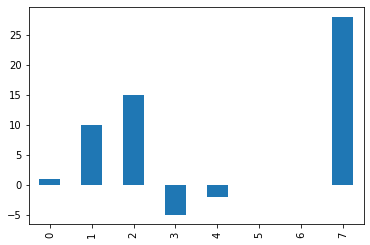

In [250]:
s.plot(kind='bar')

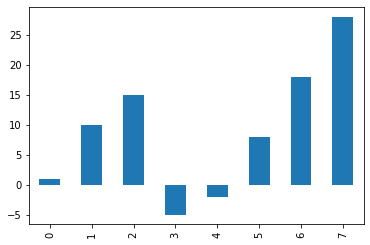

In [252]:
s.interpolate().plot(kind='bar')

#### 此时的插值与索引无关

In [257]:
s.index = np.sort(np.random.randint(1,300,8))
s.interpolate()
#值不变

62      1.0
71     10.0
89     15.0
117    -5.0
123    -2.0
166     8.0
271    18.0
293    28.0
dtype: float64

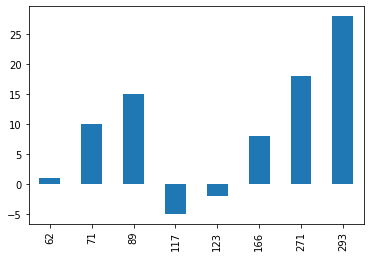

In [258]:
s.interpolate().plot(kind='bar')
#后面三个点不是线性的（如果几乎为线性函数，请重新运行上面的一个代码块，这是随机性导致的）

#### （b）与索引有关的插值
#### method中的index和time选项可以使插值线性地依赖索引，即插值为索引的线性函数

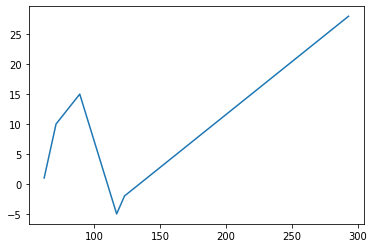

In [259]:
s.interpolate(method='index').plot()
#可以看到与上面的区别

#### 如果索引是时间，那么可以按照时间长短插值，对于时间序列将在第9章详细介绍

In [260]:
s_t = pd.Series([0,np.nan,10]
        ,index=[pd.Timestamp('2012-05-01'),pd.Timestamp('2012-05-07'),pd.Timestamp('2012-06-03')])
s_t

2012-05-01     0.0
2012-05-07     NaN
2012-06-03    10.0
dtype: float64

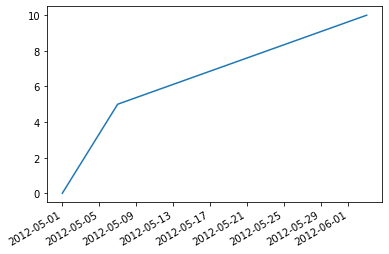

In [261]:
s_t.interpolate().plot()

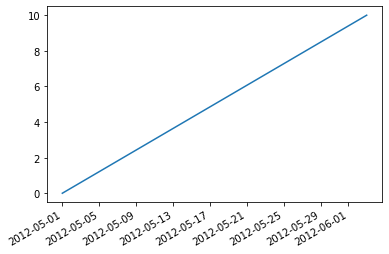

In [262]:
s_t.interpolate(method='time').plot()

### 2. 高级插值方法
#### 此处的高级指的是与线性插值相比较，例如样条插值、多项式插值、阿基玛插值等（需要安装Scipy），方法详情请看[这里](https://pandas.pydata.org/pandas-docs/version/1.0.0/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate)
#### 关于这部分仅给出一个官方的例子，因为插值方法是数值分析的内容，而不是Pandas中的基本知识：

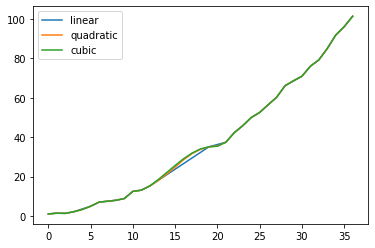

In [273]:
ser = pd.Series(np.arange(1, 10.1, .25) ** 2 + np.random.randn(37))
missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[missing] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()

### 3. interpolate中的限制参数
#### （a）limit表示最多插入多少个

In [274]:
s = pd.Series([1,np.nan,np.nan,np.nan,5])
s.interpolate(limit=2)

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

#### （b）limit_direction表示插值方向，可选forward,backward,both，默认前向

In [275]:
s = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan,5,np.nan,np.nan])
s.interpolate(limit_direction='backward')

0    1.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    NaN
8    NaN
dtype: float64

#### （c）limit_area表示插值区域，可选inside,outside，默认None

In [276]:
s = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan,5,np.nan,np.nan,])
s.interpolate(limit_area='inside')

0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    NaN
8    NaN
dtype: float64

In [277]:
s = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan,5,np.nan,np.nan,])
s.interpolate(limit_area='outside')

0    NaN
1    NaN
2    1.0
3    NaN
4    NaN
5    NaN
6    5.0
7    5.0
8    5.0
dtype: float64

In [278]:
s.interpolate??

Signature:
s.interpolate(
    method='linear',
    axis=0,
    limit=None,
    inplace=False,
    limit_direction='forward',
    limit_area=None,
    downcast=None,
    **kwargs,
)
Docstring:
Interpolate values according to different methods.

Please note that only ``method='linear'`` is supported for
DataFrame/Series with a MultiIndex.

Parameters
----------
method : str, default 'linear'
    Interpolation technique to use. One of:

    * 'linear': Ignore the index and treat the values as equally
      spaced. This is the only method supported on MultiIndexes.
    * 'time': Works on daily and higher resolution data to interpolate
      given length of interval.
    * 'index', 'values': use the actual numerical values of the index.
    * 'pad': Fill in NaNs using existing values.
    * 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'spline',
      'barycentric', 'polynomial': Passed to
      `scipy.interpolate.interp1d`. These methods use the numerical
      values of the index.  

## 五、问题与练习

### 1. 问题

#### 【问题一】 如何删除缺失值占比超过25%的列？

In [281]:
df = pd.read_csv('data/table_missing.csv') # 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   School   35 non-null     object 
 1   Class    31 non-null     object 
 2   ID       29 non-null     float64
 3   Gender   28 non-null     object 
 4   Address  35 non-null     object 
 5   Height   35 non-null     int64  
 6   Weight   22 non-null     float64
 7   Math     30 non-null     float64
 8   Physics  31 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ KB


In [287]:
df[df.columns[df.count()>len(df)*0.75]].head()
#　除了　Weight 列, 其他列都得以保留

,School,Class,ID,Gender,Address,Height,Math,Physics
0,S_1,C_1,NaN,M,street_1,173,34.0,A+
1,S_1,C_1,NaN,F,street_2,192,32.5,B+
2,S_1,C_1,1103.0,M,street_2,186,87.2,B+
3,S_1,NaN,NaN,F,street_2,167,80.4,NaN
4,S_1,C_1,1105.0,NaN,street_4,159,84.8,A-


#### 【问题二】 什么是Nullable类型？请谈谈为什么要引入这个设计？

#### 【问题三】 对于一份有缺失值的数据，可以采取哪些策略或方法深化对它的了解？

### 2. 练习

#### 【练习一】现有一份虚拟数据集，列类型分别为string/浮点/整型，请解决如下问题：
#### （a）请以列类型读入数据，并选出C为缺失值的行。

In [105]:
pd.read_csv('data/Missing_data_one.csv').head()

,A,B,C
0,not_NaN,0.922,4.0
1,not_NaN,0.700,NaN
2,not_NaN,0.503,8.0
3,not_NaN,0.938,4.0
4,not_NaN,0.952,10.0


In [298]:
!type data\Missing_data_one.csv

A,B,C
not_NaN,0.922,4
not_NaN,0.7,
not_NaN,0.503,8
not_NaN,0.938,4
not_NaN,0.952,10
not_NaN,0.972,
not_NaN,0.572,2
not_NaN,0.523,10
not_NaN,0.557,10
not_NaN,0.695,4
not_NaN,0.782,1
not_NaN,0.736,
not_NaN,0.706,0
not_NaN,0.682,3
not_NaN,0.916,8
not_NaN,0.935,5
not_NaN,0.823,1
not_NaN,0.763,2
not_NaN,0.976,5
not_NaN,0.684,
not_NaN,0.935,2
not_NaN,0.913,
not_NaN,0.538,5
not_NaN,0.552,2
not_NaN,0.892,5
not_NaN,0.891,7
not_NaN,0.96,2
not_NaN,0.799,6
not_NaN,0.577,0
not_NaN,0.801,4


In [297]:
# 如果没有缺失值, 是可以通过指定各列的数据类型来读取的,但有缺失值就不行了,因为缺失值本身是 float 类型的
#col_dtype={'A':'string','B':'float','C':'int'}
#df_a1 = pd.read_csv('data/Missing_data_one.csv',dtype=col_dtype)# 但有缺失值, 则会报错--ValueError: Integer column has NA values in column 2
#df_a1 = pd.read_csv('data/Missing_data_one.csv', dtype=col_dtype, keep_default_na= False) # 即便指定了这两个参数也不行 --ValueError: invalid literal for int() with base 10: ''
#df_a1.info()

In [292]:
df_a = pd.read_csv('data/Missing_data_one.csv').convert_dtypes()
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       30 non-null     string 
 1   B       30 non-null     float64
 2   C       25 non-null     Int64  
dtypes: Int64(1), float64(1), string(1)
memory usage: 878.0 bytes


#### （b）现需要将A中的部分单元转为缺失值，单元格中的最小转换概率为25%，且概率大小与所在行B列单元的值成正比。

In [ ]:
# 随机的权重怎么实现?
# python的random模块及加权随机算法的python实现 https://www.cnblogs.com/zywscq/p/5469661.html


#### 【练习二】 现有一份缺失的数据集，记录了36个人来自的地区、身高、体重、年龄和工资，请解决如下问题：
#### （a）统计各列缺失的比例并选出在后三列中至少有两个非缺失值的行。

In [106]:
pd.read_csv('data/Missing_data_two.csv').head()

,编号,地区,身高,体重,年龄,工资
0,1,A,157.50,NaN,47.0,15905.0
1,2,B,202.00,91.80,25.0,NaN
2,3,C,169.09,62.18,NaN,NaN
3,4,A,166.61,59.95,77.0,5434.0
4,5,B,185.19,NaN,62.0,4242.0


In [337]:
df_2=pd.read_csv('data/Missing_data_two.csv').convert_dtypes()

In [338]:
# 缺失值比例
1-df_2.count()/len(df_2)

编号    0.000000
地区    0.000000
身高    0.000000
体重    0.222222
年龄    0.250000
工资    0.222222
dtype: float64

In [339]:
# 后三列中至少有两个缺失值的行
df_2[df_2[['体重','年龄','工资']].T.count()<2]

,编号,地区,身高,体重,年龄,工资
2,3,C,169.09,62.18,<NA>,<NA>
11,12,A,202.56,92.30,<NA>,<NA>
12,13,C,177.37,NaN,79,<NA>
14,15,C,199.11,89.20,<NA>,<NA>
26,27,B,158.28,NaN,51,<NA>
32,33,C,181.01,NaN,<NA>,13021
33,34,A,196.67,87.00,<NA>,<NA>


#### （b）请结合身高列和地区列中的数据，对体重进行合理插值。

In [340]:
# 仅根据身高对体重进行插值--假设体重是关于身高的一次函数
# 首先选出身高和体重均不为空的, 然后根据这部分数据找出线性函数
df_2[['身高','体重']].dropna()

,身高,体重
1,202.00,91.80
2,169.09,62.18
3,166.61,59.95
5,187.13,78.42
6,163.81,57.43
7,183.80,75.42
8,179.67,71.70
9,186.08,77.47
10,163.41,57.07
11,202.56,92.30


In [341]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [342]:
x = df_2[['身高','体重']].dropna()['身高']
y = df_2[['身高','体重']].dropna()['体重']
x_n = sm.add_constant(x) #statsmodels进行回归时，一定要添加此常数项
model = sm.OLS(y, x_n) #model是回归分析模型
results = model.fit() #results是回归分析后的结果

In [343]:
#输出回归分析的结果
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                     体重   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.934e+08
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           1.67e-99
Time:                        15:01:17   Log-Likelihood:                 131.75
No. Observations:                  28   AIC:                            -259.5
Df Residuals:                      26   BIC:                            -256.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -89.9961      0.005  -1.68e+04      0.0

In [344]:
# 对有身高无体重的进行预测(插值)
# 选出有身高数据五体重数据的
df_2[df_2.体重.isnull() & df_2.身高.notnull()][['身高','体重']]

,身高,体重
0,157.50,NaN
4,185.19,NaN
12,177.37,NaN
15,165.68,NaN
23,165.55,NaN
26,158.28,NaN
30,181.19,NaN
32,181.01,NaN


In [349]:
x_pre=df_2[df_2.体重.isnull() & df_2.身高.notnull()][['身高','体重']].身高
y_pre=round(-89.996131+0.899978*x_pre,2)
y_pre=y_pre.to_frame()
y_pre.columns=['体重']
y_pre # 体重出现负数了...

,体重
0,-43.42
4,-20.99
12,-27.33
15,-36.80
23,-36.90
26,-42.79
30,-24.23
32,-24.38


In [351]:
# 使用update 更新数据--这种情况就不用更新了--更新方法是使用 update 或 combine_first 等等
#df_2.update(y_pre)
#df_2

In [ ]:
# 增加其他变量
